## Practical Application of Conjugate and Jeffrey Prior Distributions

We want to estimate a product's defect rate in a manufacturing process. For simplicity, the defect rate follows a Bernoulli process (each item is either defective or not defective). 

### Choice of the prior
- Conjugate prior: We can use a Beta distribution as the prior for the defect rate. The Beta distribution is a convenient choice because the Beta distribution is a conjugate prior to the Binomial likelihood, which means the posterior distribution will also be a Beta distribution.
- Jeffrey prior: The Jeffrey's prior is a non-informative prior that is often used when there's little or no prior information about the parameters of interest. In the case of estimating a probability (such as a defect rate in manufacturing), the Jeffrey's prior for the Binomial likelihood is a Beta distribution with parameters α=0.5 and β=0.5. This is derived from considering the Fisher information of the Bernoulli distribution and is intended to be less informative than typical informative priors.

In [ ]:
#Import relevant libraries
from scipy.stats import beta
import matplotlib.pyplot as plt
import numpy as np

### Prior Assumptions
We estimate the defect rate with some uncertainty, so we set our prior Beta distribution parameters to α=2 and β=18. This gives a mean prior defect rate of about 10%, leaning towards lower defect rates due to more weight on the β parameter.

In the case of estimating a probability (such as a defect rate in manufacturing), the Jeffrey's prior for the Binomial likelihood is a Beta distribution with parameters α=0.5 and β=0.5. This is derived from considering the Fisher information of the Bernoulli distribution and is intended to be less informative than typical informative priors.

In [53]:
# Initial conjugate prior parameters
alpha_prior = 2
beta_prior = 18

# Prior parameters using Jeffrey prior
alpha_jeffrey = 0.5
beta_jeffrey = 0.5

### Data
Assuming we inspect 100 products, we find that 10 are defective. We then compute the posterior distribution based on the observable data and our prior assumptions. As can be observed, the computaiton is much faster as the set is already normalized and the structure allows for easy recurrent updates of the posterior distribution if new observations are made. 

In [ ]:
# Observed defects
observed_defects = 10
total_inspected = 100

In [54]:
# Update the conjugate prior with the data
alpha_post = alpha_prior + observed_defects
beta_post = beta_prior + (total_inspected - observed_defects)

# Update Jeffrey prior with the data
alpha_jeffrey_post = alpha_jeffrey + observed_defects
beta_jeffrey_post = beta_jeffrey + (total_inspected - observed_defects)

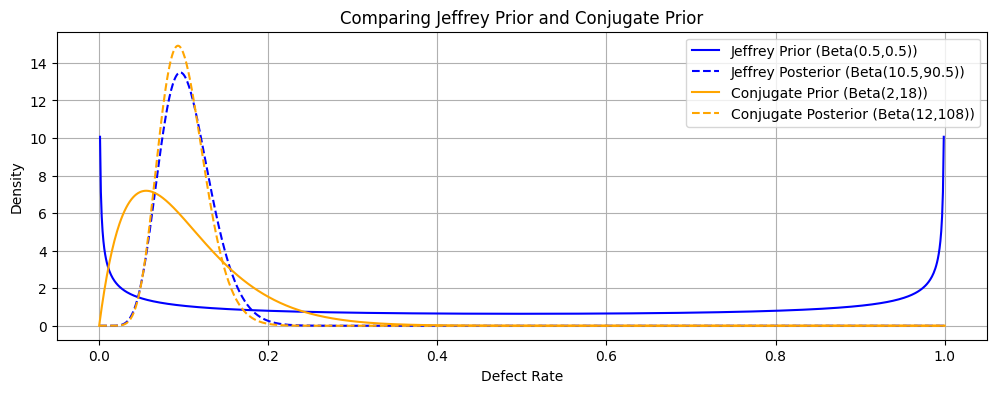

In [61]:
# Plotting the prior and posterior distributions
x = np.linspace(0, 1, 1000)
y_jeffrey_prior = beta.pdf(x, alpha_jeffrey, beta_jeffrey)
y_jeffrey_post = beta.pdf(x, alpha_jeffrey_post, beta_jeffrey_post)
y_prior = beta.pdf(x, alpha_prior, beta_prior)
y_post = beta.pdf(x, alpha_post, beta_post)

plt.figure(figsize=(12, 4))
plt.plot(x, y_jeffrey_prior, label='Jeffrey Prior (Beta(0.5,0.5))', color='blue')
plt.plot(x, y_jeffrey_post, label='Jeffrey Posterior (Beta(10.5,90.5))', linestyle='--', color='blue')
plt.plot(x, y_prior, label='Conjugate Prior (Beta(2,18))', color='orange')
plt.plot(x, y_post, label='Conjugate Posterior (Beta(12,108))', linestyle='--', color='orange')
plt.xlabel('Defect Rate')
plt.ylabel('Density')
plt.title('Comparing Jeffrey Prior and Conjugate Prior')
plt.legend()
plt.grid(True)
plt.savefig("posterior.png")
plt.show()
